# **Build Unsupervised Learning Models using Python**



---



## PROJECT CONTENTS:
- Project Information
- Description of Data
- Data Sampling
- Project Objectives | Problem Statements
- Analysis of Data
- Observations | Findings
- Managerial Insights | Recommendations

---

### 1. Project Information
- **Title**: Data Exploration with Python using Pandas & Numpy Libraries
- **Students**: Krishnendu Adhikary (055022), Mohit Agarwal (055024)
- **Group Number**: 2

---

### **2. Description of Data**
- **Data Source**: https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000

  A live link is used in the dataset

- **Data Columns Description**:
  - **Transaction_ID**: Unique identifier for each trade transaction.
  - **Country**: Country of origin or destination for the trade.
  - **Product**: Product being traded.
  - **Import_Export**: Indicates whether the transaction is an import or export.
  - **Quantity**: Amount of the product traded.
  - **Value**: Monetary value of the product in USD.
  - **Date**: Date of the transaction.
  - **Category**: Category of the product (e.g., Electronics, Clothing, Machinery).
  - **Port**: Port of entry or departure.
  - **Customs_Code**: Customs or HS code for product classification.
  - **Weight**: Weight of the product in kilograms.
  - **Shipping_Method**: Method used for shipping (e.g., Air, Sea, Land).
  - **Supplier**: Name of the supplier or manufacturer.
  - **Customer**: Name of the customer or recipient.
  - **Invoice_Number**: Unique invoice number for the transaction.
  - **Payment_Terms**: Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).

- **Data Type**: Since the dataset contains multiple entities (countries) and records data over time, this is an example of Panel Data (also called longitudinal data).

- **Data Variables**:
  - **All non-null Variables**
    - **Numbers**:
      - Integer Variables: 3 (Quantity, Customs_Code, Invoice_Number)
      - Float (Decimal) Variables: 2 (Value, Weight)
    - **Text**: 9 (Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms)
    - **DateTime**: 1 (Date)

---

### **3. Data Sampling**
From the dataset containing 15,000 values, a sample of 5001 entries was taken. The dataset sample (now referred to as `my_sample`) was taken into account for further exploration. To match with the project objectives, a new column was added to the sample dataset called **Total Value**, representing the product of the value of the product and its quantity imported/exported.

- **Data Variables**:
  - **Index Variables**: 'Transaction_ID', 'Invoice_Number'
  - **Categorical Variables**:
    - Nominal Variables: Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customs_Code, Customer
    - Ordinal Variable: Payment_Terms
  - **Non-Categorical Variables**: Quantity, Value, and Weight

---

### 4. Project Objectives
- Perform Unsupervised Machine Learning
- Segmentation of dataset using Unsupervised Machine Learning Clustering Algorithms
- Identification of appropriate number of segments or clusters
- Determination of segment or cluster characteristics

---

### 5. Exploratory Data Analysis
#### 5.1. Data Preprocessing:
- The data has no missing values, hence no missing data treatment was performed.
- For Encoding, **Ordinal Encoder** was used.
- For Scaling, **Min-Max Scaler** was used.

#### 5.2. Descriptive Statistics
- **Non-Categorical Variables**:
  - Measures of Central Tendency: Minimum, Maximum, Mean, Median, Mode, Percentile
  - Measures of Dispersion: Range, Standard Deviation, Skewness, Kurtosis, Correlation (Matrix)
  - Composite Measure: Coefficient of Variation, Confidence Interval

- **Categorical Variables**:
  - Count, Frequency, Proportion, Minimum, Maximum, Mode, Rank

#### 5.3. Data Visualization
- Various subplots were used such as Bar, Heatmaps, Histograms, and Correlation Matrices.

#### 5.4. Inferential Statistics
- **Categorical Variable** (Nominal | Ordinal):
  - Test of Homogeneity (Chi-sq)
- **Non-Categorical Variable**:
  - Test of Normality (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, Jarque-Bera)
  - Test of Correlation (t)

#### 5.5. Machine Learning Models
- **Dimensionality Reduction**: Records Clustering: K-Means (KM), DBSCAN, BIRCH
- **Dimensionality Reduction**: Principal Component Analysis (PCA)

#### 5.6. Model Performance Metrics
- **Silhouette Coefficient**, **Davies-Bouldin Index** to evaluate the model performance
- **Model Run Statistics**:
  - Time Taken
  - Memory Used

#### 5.7. Diagnostics
- **Clustering**: Cluster Characteristics (Nature of each Cluster - Homogeneity), Difference between Clusters (Heterogeneity)

---

In [ ]:
# Import Relevant Python Libraries

from io import StringIO
import requests
import pandas as pd
import statsmodels.formula.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, kstest, anderson, jarque_bera
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, Birch
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer, KNNImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus  # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score,davies_bouldin_score  # For Clustering Model Evaluation
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats as stats
import statsmodels.stats.multicomp as multi
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Replace with your actual file ID
file_id = '1F6j4DkSVdF-36nxvLiDLu1qOE9lHhzcC'

# Construct the URL
url = f'https://drive.google.com/uc?id={file_id}'  #using f-string (format string)

# Fetch the data using requests
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
ka22_df = pd.read_csv(StringIO(response.text))

In [ ]:
# Data Dimensions
print("The dimensions of the data is: ",ka22_df.shape)

The dimensions of the data is:  (15000, 16)


In [ ]:
# Data Variable Type
ka22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [ ]:
# Bifurcating the Variables into Index, Categorical (Nominal, Ordinal) and Non-Categorical Variables

ka22_index_vars=['Transaction_ID','Invoice_Number']
ka22_nominal_vars=[ 'Country','Product','Import_Export','Category','Port','Shipping_Method','Supplier','Customer','Customs_Code']
ka22_ordinal_vars=['Payment_Terms']

ka22_cat_vars= ka22_nominal_vars + ka22_ordinal_vars
ka22_non_cat_vars=['Quantity','Value','Weight']

## **Taking a Unique Sample of 5001 Records**


In [ ]:
ka22_sample = pd.DataFrame.sample(ka22_df, n=5001, random_state=2224 ,ignore_index=False)
# Displaying the Dimensions of Sample Data.
ka22_sample.shape

(5001, 16)

## **Data Pre-Processing**

In [ ]:
ka22_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 12012 to 12895
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
# Check for missing values

ka22_sample.isnull().sum(axis=1)

,0
12012,0
9494,0
2445,0
8644,0
2250,0
...,...
12386,0
11044,0
377,0
1527,0


**> Observation**: As the sum of the missing data column is 0, it is evident
that there's no presence of missing data in the dataset. So the process of missing data treatment is skipped.

In [ ]:
# Encoding

ka22_oe = OrdinalEncoder()
ka22_categorical_cols = ka22_sample[ka22_cat_vars]
ka22_oe_fit = ka22_oe.fit_transform(ka22_categorical_cols)
ka22_encoded = pd.DataFrame(ka22_oe_fit, columns=ka22_cat_vars)
ka22_encoded.head()

,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Customs_Code,Payment_Terms
0,58.0,915.0,0.0,0.0,1509.0,0.0,1855.0,2407.0,884.0,0.0
1,222.0,520.0,0.0,0.0,3945.0,1.0,785.0,918.0,3396.0,2.0
2,181.0,210.0,1.0,2.0,1814.0,0.0,4117.0,3953.0,2489.0,0.0
3,136.0,328.0,0.0,0.0,3492.0,2.0,2696.0,4396.0,273.0,3.0
4,119.0,882.0,0.0,3.0,3255.0,0.0,726.0,2515.0,494.0,3.0


In [ ]:
#Scaling

ka22_scaler = MinMaxScaler()
ka22_scaled_data = ka22_scaler.fit_transform(ka22_sample[ka22_non_cat_vars])
ka22_scaled = pd.DataFrame(ka22_scaled_data, columns=ka22_non_cat_vars)
ka22_scaled.head()

,Quantity,Value,Weight
0,0.544417,0.863799,0.729039
1,0.563245,0.991041,0.732572
2,0.523986,0.267105,0.116200
3,0.043165,0.012467,0.183754
4,0.570456,0.397490,0.408103


In [ ]:
# The pre-processed Dataset

ka22_processed = pd.concat([ka22_scaled, ka22_encoded], axis=1)
ka22_processed.head()

ka22_sample = ka22_processed
ka22_sample.head()

,Quantity,Value,Weight,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Customs_Code,Payment_Terms
0,0.544417,0.863799,0.729039,58.0,915.0,0.0,0.0,1509.0,0.0,1855.0,2407.0,884.0,0.0
1,0.563245,0.991041,0.732572,222.0,520.0,0.0,0.0,3945.0,1.0,785.0,918.0,3396.0,2.0
2,0.523986,0.267105,0.116200,181.0,210.0,1.0,2.0,1814.0,0.0,4117.0,3953.0,2489.0,0.0
3,0.043165,0.012467,0.183754,136.0,328.0,0.0,0.0,3492.0,2.0,2696.0,4396.0,273.0,3.0
4,0.570456,0.397490,0.408103,119.0,882.0,0.0,3.0,3255.0,0.0,726.0,2515.0,494.0,3.0


## **Descriptive Statistics**

### **1. Non-Categorical Variables**

In [ ]:
ka22_sample[ka22_non_cat_vars].describe()

,Quantity,Value,Weight
count,5001.000000,5001.000000,5001.000000
mean,0.492638,0.496782,0.497386
std,0.286744,0.289138,0.290268
min,0.000000,0.000000,0.000000
25%,0.243365,0.246292,0.248372
50%,0.492238,0.493100,0.493987
75%,0.735804,0.748505,0.749106
max,1.000000,1.000000,1.000000


#### **> Observations:**

**Central Tendency:** The mean and median for Quantity, Value, and Weight are all close to 0.5. This indicates a symmetric distribution for each, with data points evenly spread around the central value.

**Similar Variability:** Standard deviation is around 0.29 for all three variables, showing a moderate and comparable degree of spread or dispersion in the data. Values are not overly clustered around the mean.

**Scaled Data:** Minimum (0) and maximum (1) values strongly suggest the data has been normalized using MinMaxScaler, bringing all variables to a similar and comparable scale.

In [ ]:
def summarize_numerical(my_sample, variables):
    summary = {}

    for col in variables:
        if col in ka22_sample[ka22_non_cat_vars]:  # Check if the column exists in the DataFrame
            summary[col] = {
                'Mode': my_sample[col].mode()[0],
                'Range': my_sample[col].max() - my_sample[col].min(),
                'Skewness': my_sample[col].skew() ,
                'Kurtosis': my_sample[col].kurtosis()
            }
    return summary

In [ ]:
summary_stats = summarize_numerical(ka22_sample,ka22_non_cat_vars)
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df

,Mode,Range,Skewness,Kurtosis
Quantity,0.142213,1.0,0.015662,-1.184536
Value,0.060404,1.0,0.026885,-1.189913
Weight,0.004377,1.0,0.026550,-1.214136


#### **> Observations:**

**Near-Symmetric Distribution:** Skewness values for Quantity, Value, and Weight are near 0, indicating near-symmetric distributions around their means. This implies a balanced frequency of observations on both sides of the average with a slight tendency toward positive skew.

**Platykurtic with Reduced Outliers:** Negative kurtosis values indicate platykurtic distributions with fewer extreme values or outliers compared to a normal distribution. Data points are concentrated around the mean, reducing the likelihood of observing extremely high or low values.

**Full Range Post-Scaling:** The range of 1.0 confirms that MinMax scaling has normalized the data to span the entire range from 0 to 1. This reflects substantial variability in the original raw data for Quantity, Value, and Weight before scaling.

In [ ]:
# Coefficient of Variation
def coefficient_of_variation(data):
    mean = data.mean()
    std = data.std()
    cv = (std / mean) * 100
    return cv

cv_results = {}

for col in ka22_non_cat_vars:
    cv_results[col] = coefficient_of_variation(ka22_sample[col])

# Display the results
print("Coefficient of Variation (%):")
for col, cv in cv_results.items():
    print(f"{col}: {cv:.2f}%")

Coefficient of Variation (%):
Quantity: 58.21%
Value: 58.20%
Weight: 58.36%


####**> Observations:**

**Moderate Variability:** CV values around 58% for Quantity, Value, and Weight indicate moderate data dispersion around their respective means.

**Similar Relative Variability:** Nearly identical CV values across the three variables suggest comparable levels of relative variability.

**Potential Implications:** Moderate CV values may indicate inherent data diversity or potential risks associated with fluctuations in these variables.

In [ ]:
# Confidence Interval for the Mean
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std = data.std()
    n = len(data)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)  # z-score for 95% CI
    margin_of_error = z * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return (lower_bound, upper_bound)

ci_results = {}
for col in ka22_non_cat_vars:
    ci_results[col] = confidence_interval(ka22_sample[col])


print("\nConfidence Intervals (95%):")
for col, ci in ci_results.items():
    print(f"{col}: {ci[0]:.2f} to {ci[1]:.2f}")


Confidence Intervals (95%):
Quantity: 0.48 to 0.50
Value: 0.49 to 0.50
Weight: 0.49 to 0.51


####**> Observations:**

**Precise Mean Estimation:** Narrow CI ranges for Quantity, Value, and Weight indicate precise estimation of their population means. We can be 95% confident that the true population means lie within these intervals.

**Centered Around 0.5:** The CIs are centered around 0.5, suggesting that the distributions are likely centered around this value after MinMax scaling.

**Slightly Higher Variability for Weight:** The slightly wider CI for Weight (0.49 to 0.51) compared to Quantity and Value indicates a marginally higher uncertainty in estimating its population mean.

In [ ]:
correlation_data = ka22_sample[ka22_non_cat_vars]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Quantity,Value,Weight
Quantity,1.000000,-0.011005,0.030818
Value,-0.011005,1.000000,0.007835
Weight,0.030818,0.007835,1.000000


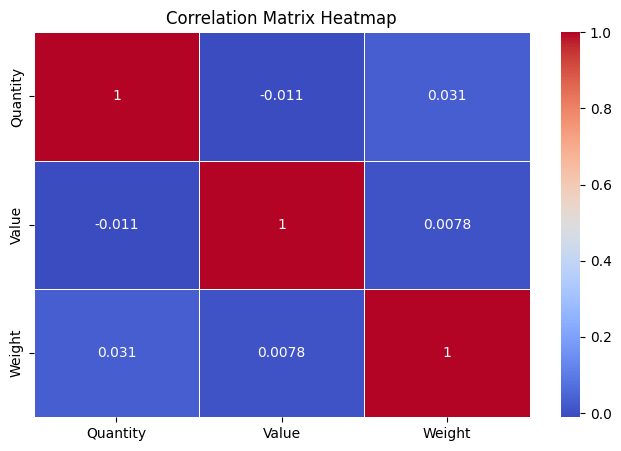

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

####**> Observations:**

**No Strong Linear Relationships:** Correlation coefficients near 0 indicate a lack of strong linear relationships between Quantity, Value, and Weight.

**Weak Positive Quantity-Weight:** A slight positive correlation (0.030818) suggests a weak tendency for Quantity and Weight to increase together.

**Essentially Independent:** Near-zero correlations imply that the variables can be considered largely independent for modeling purposes

### **2. Categorical Variables**

In [ ]:
# Categorical Data

def ka22_categorical_summary(df, cat_cols):
    summary = {}
    for col in cat_cols:
        if col in df.columns:
            summary[col] = {
                'Count': df[col].count(),
                'Minimum': df[col].min(),
                'Maximum': df[col].max(),
                'Mode': df[col].mode().iloc[0],
            }
    return summary

ka22_categorical_summaries = ka22_categorical_summary(ka22_sample, ka22_cat_vars)

for col, stats in ka22_categorical_summaries.items():
    print(f"Summary for {col}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name}: {stat_value}")
    print("-" * 20)  # separator

Summary for Country:
  Count: 5001
  Minimum: 0.0
  Maximum: 242.0
  Mode: 49.0
--------------------
Summary for Product:
  Count: 5001
  Minimum: 0.0
  Maximum: 967.0
  Mode: 137.0
--------------------
Summary for Import_Export:
  Count: 5001
  Minimum: 0.0
  Maximum: 1.0
  Mode: 0.0
--------------------
Summary for Category:
  Count: 5001
  Minimum: 0.0
  Maximum: 4.0
  Mode: 1.0
--------------------
Summary for Port:
  Count: 5001
  Minimum: 0.0
  Maximum: 4300.0
  Mode: 2955.0
--------------------
Summary for Shipping_Method:
  Count: 5001
  Minimum: 0.0
  Maximum: 2.0
  Mode: 1.0
--------------------
Summary for Supplier:
  Count: 5001
  Minimum: 0.0
  Maximum: 4539.0
  Mode: 3694.0
--------------------
Summary for Customer:
  Count: 5001
  Minimum: 0.0
  Maximum: 4833.0
  Mode: 1853.0
--------------------
Summary for Customs_Code:
  Count: 5001
  Minimum: 0.0
  Maximum: 4985.0
  Mode: 646.0
--------------------
Summary for Payment_Terms:
  Count: 5001
  Minimum: 0.0
  Maximum: 3.

## **Data Visualization**

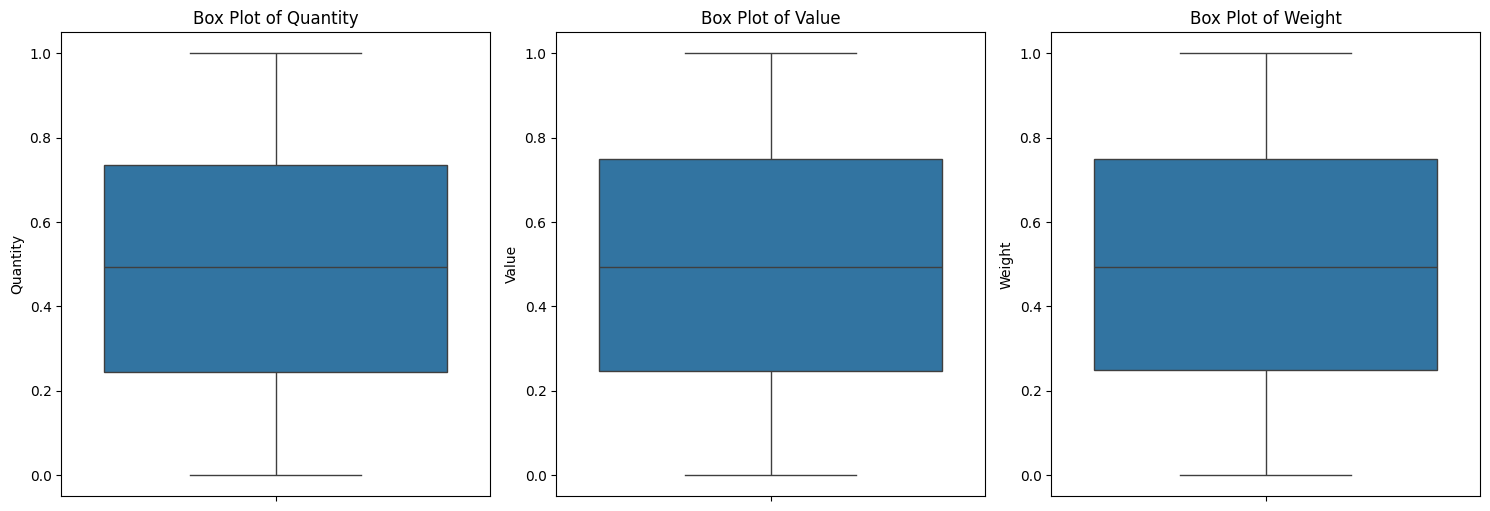

In [ ]:
# Box plots for non-categorical variables

plt.figure(figsize=(15, 10))
for i, col in enumerate(ka22_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=ka22_sample[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

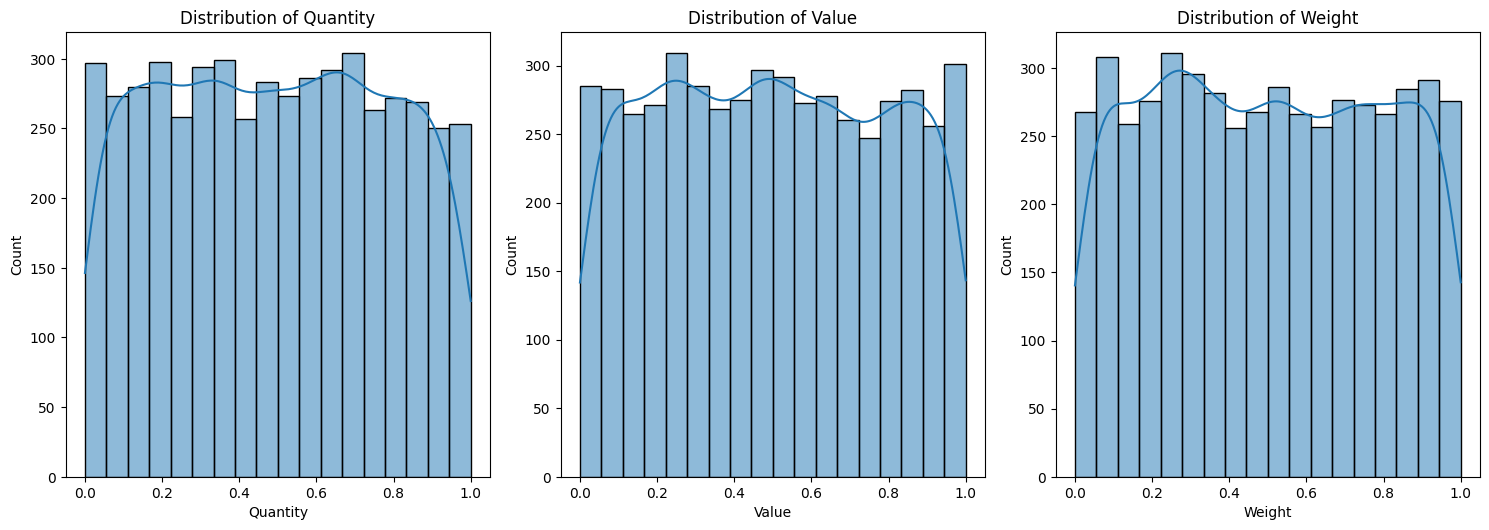

In [ ]:
# Histograms with KDE for distribution visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(ka22_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(ka22_sample[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

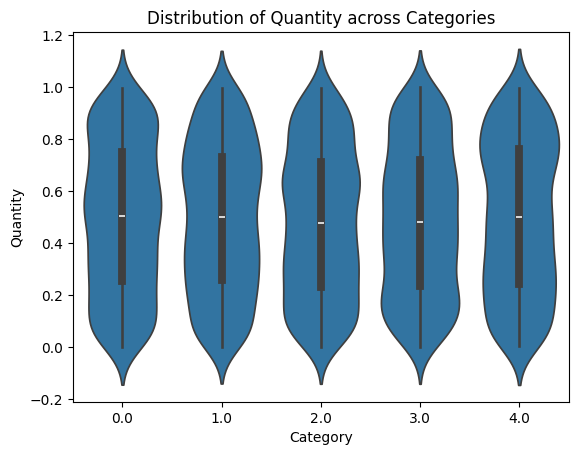

In [ ]:
# Violin Plot

sns.violinplot(x='Category', y='Quantity', data=ka22_sample)
plt.title('Distribution of Quantity across Categories')
plt.show()

## **Inferential Statistics**

In [ ]:
# Test of Homogeneity {Chi-sq} on categorical data

ka22_contingency_table = pd.crosstab(ka22_sample['Import_Export'], ka22_sample['Category'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(ka22_contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
ka22_alpha = 0.05  # Significance level

if p < ka22_alpha:
    print("Reject the null hypothesis: There is a significant association between the two categorical variables.")
else:
    print("There is no significant association between the two categorical variables.")

Chi-square statistic: 1.1917318295235333
P-value: 0.8794580332259992
Degrees of freedom: 4
Expected frequencies:
[[503.15176965 524.93981204 509.73885223 515.81923615 480.35032993]
 [489.84823035 511.06018796 496.26114777 502.18076385 467.64967007]]
There is no significant association between the two categorical variables.


In [ ]:
# Test of Normality {Shapiro-Wilk | Kolmogorov-Smirnov | Anderson-Darling | Jarque-Bera

def normality_tests(data):

    ka22_results = {}

    # Shapiro-Wilk test
    shapiro_statistic, shapiro_pvalue = shapiro(data)
    ka22_results["Shapiro-Wilk"] = {"statistic": shapiro_statistic, "p-value": shapiro_pvalue}

    # Kolmogorov-Smirnov test (against a normal distribution)
    ks_statistic, ks_pvalue = kstest(data, 'norm')
    ka22_results["Kolmogorov-Smirnov"] = {"statistic": ks_statistic, "p-value": ks_pvalue}

    # Anderson-Darling test
    anderson_result = anderson(data)
    ka22_results["Anderson-Darling"] = {
        "statistic": anderson_result.statistic,
        "critical_values": anderson_result.critical_values,
        "significance_level": anderson_result.significance_level
    }

    # Jarque-Bera test
    jb_statistic, jb_pvalue = jarque_bera(data)
    ka22_results["Jarque-Bera"] = {"statistic": jb_statistic, "p-value": jb_pvalue}

    return ka22_results

In [ ]:
from scipy import stats

# Test of Correlation (T-test)
def t_test_correlation(data1, data2):
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    return {"t-statistic": t_statistic, "p-value": p_value}

for col in ka22_non_cat_vars:
    print(f"Normality tests for {col}:")
    normality_test_results = normality_tests(ka22_sample[col])
    for test_name, result in normality_test_results.items():
        print(f"  {test_name}: {result}")

    # Example of T-test
    if len(ka22_non_cat_vars) > 1:
        for i in range(len(ka22_non_cat_vars)):
            for j in range(i+1, len(ka22_non_cat_vars)):
                col1, col2 = ka22_non_cat_vars[i], ka22_non_cat_vars[j]
                t_test_result = t_test_correlation(ka22_sample[col1], ka22_sample[col2])
                print(f"T-test Correlation between {col1} and {col2}: {t_test_result}")
    print()
    print('*'*20)
    print()

Normality tests for Quantity:
  Shapiro-Wilk: {'statistic': 0.9566722831415138, 'p-value': 3.5159014688151e-36}
  Kolmogorov-Smirnov: {'statistic': 0.5, 'p-value': 0.0}
  Anderson-Darling: {'statistic': 53.031494380904405, 'critical_values': array([0.576, 0.655, 0.786, 0.917, 1.091]), 'significance_level': array([15. , 10. ,  5. ,  2.5,  1. ])}
  Jarque-Bera: {'statistic': 292.5885492144011, 'p-value': 2.9187964142828283e-64}
T-test Correlation between Quantity and Value: {'t-statistic': -0.7195807933968481, 'p-value': 0.47179995722395063}
T-test Correlation between Quantity and Weight: {'t-statistic': -0.8227926857659713, 'p-value': 0.41064551613336575}
T-test Correlation between Value and Weight: {'t-statistic': -0.10419743135783358, 'p-value': 0.9170147619605608}

********************

Normality tests for Value:
  Shapiro-Wilk: {'statistic': 0.9553024667471335, 'p-value': 1.2539058340815511e-36}
  Kolmogorov-Smirnov: {'statistic': 0.5, 'p-value': 0.0}
  Anderson-Darling: {'statistic

####**> Observations for Normality Tests for Quantity**

**Shapiro-Wilk:** The extremely low p-value (3.5159014688151e-36) strongly suggests that the Quantity data is not normally distributed.

**Kolmogorov-Smirnov:** With a p-value of 0.0, this test also strongly rejects the null hypothesis of normality, confirming that the Quantity data is not normally distributed.

**Anderson-Darling:** The high test statistic (53.031494380904405) and comparison to critical values further supports the rejection of normality for the Quantity data.

**Jarque-Bera:** Similar to the other tests, the extremely low p-value (2.9187964142828283e-64) provides strong evidence against the normality of the Quantity data.

####**> Observations for Normality Tests for Value**

**Shapiro-Wilk:** The extremely low p-value (1.2539058340815511e-36) strongly indicates that the Value data is not normally distributed.

**Kolmogorov-Smirnov:** Similar to the Shapiro-Wilk test, the p-value of 0.0 leads to a strong rejection of the null hypothesis, confirming the non-normality of the Value data.

**Anderson-Darling:** The high test statistic (54.09962979367447) and its comparison to critical values further support the rejection of normality for the Value data.

**Jarque-Bera:** With an extremely low p-value (6.334608669511041e-65), this test also provides strong evidence against the normality of the Value data.

####**> Observations for Normality Tests for Weight**

**Shapiro-Wilk:** The extremely low p-value (2.7762022922601706e-37) strongly indicates that the Weight data is not normally distributed.

**Kolmogorov-Smirnov:** With a p-value of 0.0, this test also strongly rejects the null hypothesis of normality, confirming that the Weight data is not normally distributed.

**Anderson-Darling:** The high test statistic (58.814060407921716) and comparison to critical values further support the rejection of normality for the Weight data.

**Jarque-Bera:** Similar to the other tests, the extremely low p-value (1.4881962325365222e-67) provides strong evidence against the normality of the Weight data.

#**Unsupervised Learning**


### Kmeans Clustering

In [ ]:
# Subset for cluster
ka22_ds_subset = ka22_processed[['Quantity','Weight']]
ka22_ds_subset

# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

ka22_km_2cluster = KMeans(n_clusters=2, init='random', random_state=111)
ka22_km_2cluster_model = ka22_km_2cluster.fit_predict(ka22_ds_subset);
print(ka22_km_2cluster_model)

ka22_km_3cluster = KMeans(n_clusters=3, init='random', random_state=444)
ka22_km_3cluster_model = ka22_km_3cluster.fit_predict(ka22_ds_subset);
print(ka22_km_3cluster_model)


ka22_km_4cluster = KMeans(n_clusters=4, init='random', random_state=555)
ka22_km_4cluster_model = ka22_km_4cluster.fit_predict(ka22_ds_subset);
print(ka22_km_4cluster_model)


ka22_km_5cluster = KMeans(n_clusters=5, init='random', random_state=666)
ka22_km_5cluster_model = ka22_km_5cluster.fit_predict(ka22_ds_subset);
print(ka22_km_5cluster_model)


[0 0 1 ... 1 1 0]
[0 0 1 ... 1 1 0]
[3 3 2 ... 1 1 0]
[0 0 1 ... 1 1 3]


In [ ]:
# 2.1.3. K-Means Clustering Model Evaluation [K=2 | K=3]
# ------------------------------------------------------

ka22_sscore_km_2cluster = silhouette_score(ka22_ds_subset, ka22_km_2cluster_model); ka22_sscore_km_2cluster
ka22_dbscore_km_2cluster = davies_bouldin_score(ka22_ds_subset, ka22_km_2cluster_model);
print(ka22_sscore_km_2cluster,ka22_dbscore_km_2cluster)

ka22_sscore_km_3cluster = silhouette_score(ka22_ds_subset, ka22_km_3cluster_model); ka22_sscore_km_3cluster
ka22_dbscore_km_3cluster = davies_bouldin_score(ka22_ds_subset, ka22_km_3cluster_model);
print(ka22_sscore_km_3cluster,ka22_dbscore_km_3cluster)

ka22_sscore_km_4cluster = silhouette_score(ka22_ds_subset, ka22_km_4cluster_model); ka22_sscore_km_4cluster
ka22_dbscore_km_4cluster = davies_bouldin_score(ka22_ds_subset, ka22_km_4cluster_model);
print(ka22_sscore_km_4cluster,ka22_dbscore_km_4cluster)

ka22_sscore_km_5cluster = silhouette_score(ka22_ds_subset, ka22_km_5cluster_model); ka22_sscore_km_5cluster
ka22_dbscore_km_5cluster = davies_bouldin_score(ka22_ds_subset, ka22_km_5cluster_model);
print(ka22_sscore_km_5cluster,ka22_dbscore_km_5cluster)
# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)



0.35940411751543216 1.1648392700298404
0.38330861960495777 0.8631462014341406
0.40741703779846455 0.7729561831270889
0.3800619597373338 0.8894553154507958


In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_3cluster_model

ka22_ds_subset_kmcluster = ka22_ds_subset.copy()
ka22_ds_subset_kmcluster.reset_index(level=0, inplace=True, names='index')
ka22_ds_subset_kmcluster['cluster_number'] = ka22_km_4cluster_model
ka22_ds_subset_kmcluster.sort_values('cluster_number', inplace=True);
ka22_ds_subset_kmcluster
# ka22_ds_subset.head(10)

#ka22_ds_subset_kmcluster = pd.DataFrame()
#ka22_ds_subset_kmcluster['Car_Index'] = mtcars_subset.index.values
#ka22_ds_subset_kmcluster['Cluster_Number'] = km_3cluster_model
#ka22_ds_subset_kmcluster.sort_values('Cluster_Number', inplace=True); ka22_ds_subset_kmcluster
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,index,Quantity,Weight,cluster_number
5000,5000,0.450175,0.944640,0
1587,1587,0.233751,0.752936,0
1585,1585,0.379569,0.636452,0
1584,1584,0.252178,0.782653,0
1581,1581,0.100851,0.853647,0
...,...,...,...,...
1777,1777,0.666199,0.938291,3
3782,3782,0.756435,0.790281,3
3781,3781,0.640361,0.917360,3
3773,3773,0.669204,0.818246,3


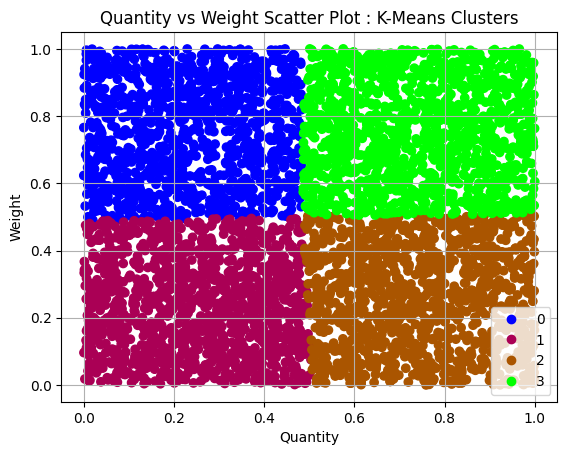

In [ ]:
# 2.3. Plot the K-Means Clustered Data
# ------------------------------------

# Cluster Model Used : km_3cluster_model

ka22_cluster_labels = list(ka22_ds_subset_kmcluster['cluster_number'].unique())
ka22_scatter_plot = plt.scatter(x='Quantity', y='Weight', data=ka22_ds_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=ka22_scatter_plot.legend_elements()[0], labels=ka22_cluster_labels)
plt.xlabel('Quantity')
plt.ylabel('Weight')
plt.title('Quantity vs Weight Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

#km_clusterplot_sb = sns.scatterplot(x='hp', y='mpg', hue='cluster_number', palette='brg', data=ka22_ds_subset_kmcluster)
#km_clusterplot_sb.set(title='Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')


### Birch and DBscan

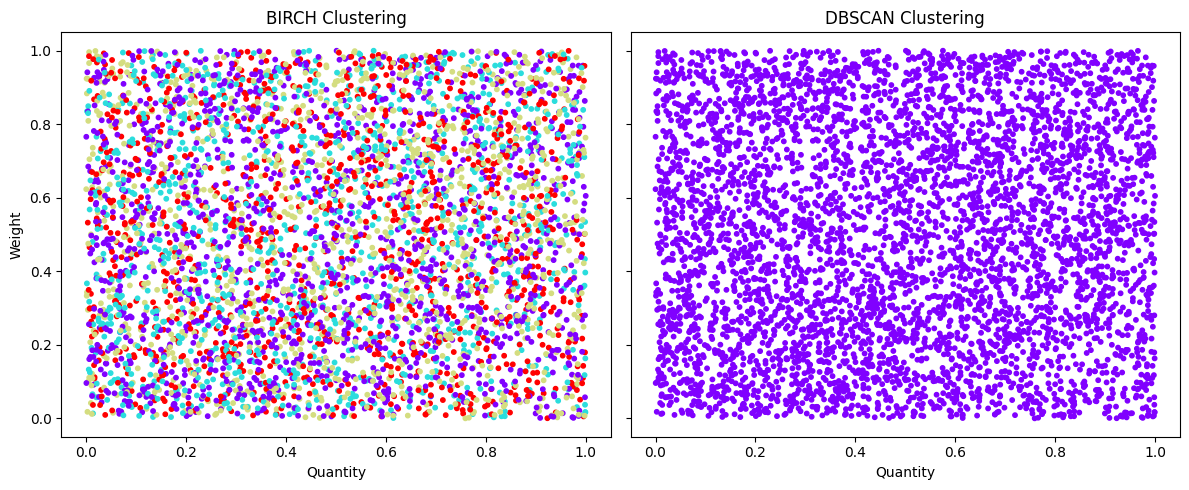

In [ ]:
birch_model = Birch(n_clusters=4, threshold=0.5)
birch_clusters = birch_model.fit_predict(ka22_ds_subset_kmcluster)

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan_model.fit_predict(ka22_ds_subset_kmcluster)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# BIRCH Plot
axes[0].scatter(ka22_ds_subset_kmcluster['Quantity'], ka22_ds_subset_kmcluster['Weight'], c=birch_clusters, cmap='rainbow', s=10)
axes[0].set_title('BIRCH Clustering')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Weight')

# DBSCAN Plot
axes[1].scatter(ka22_ds_subset_kmcluster['Quantity'], ka22_ds_subset_kmcluster['Weight'], c=dbscan_clusters, cmap='rainbow', s=10)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Quantity')

plt.tight_layout()
plt.show()